In [1]:
import seaborn as sns
sns.set_theme(style="white")

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

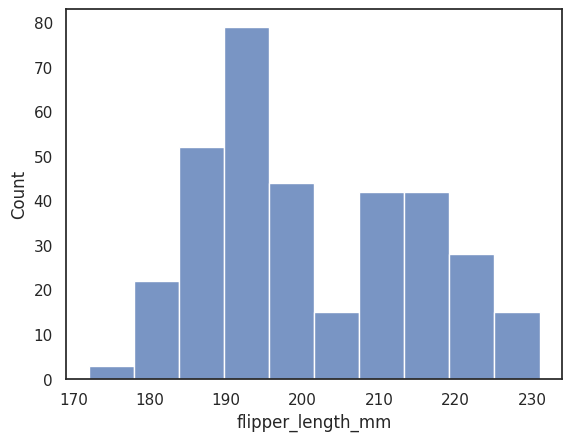

In [2]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

Flip the plot by assigning the data variable to the y axis:

<Axes: xlabel='Count', ylabel='flipper_length_mm'>

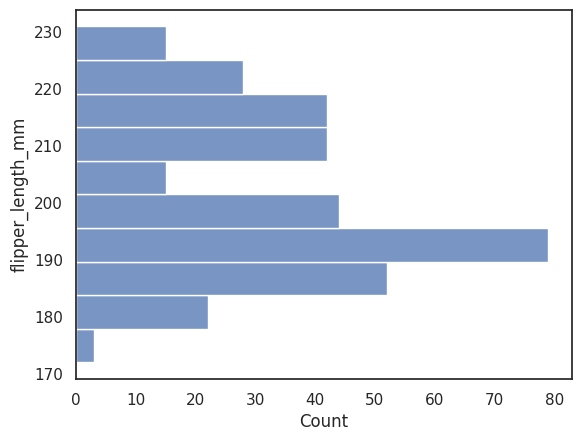

In [3]:
sns.histplot(data=penguins, y="flipper_length_mm")

Check how well the histogram represents the data by specifying a different bin width:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

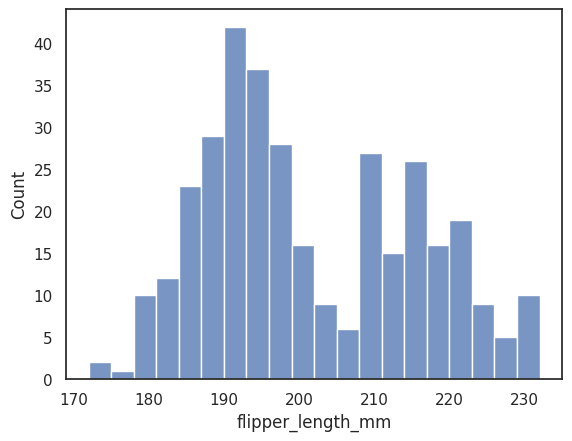

In [4]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

You can also define the total number of bins to use:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

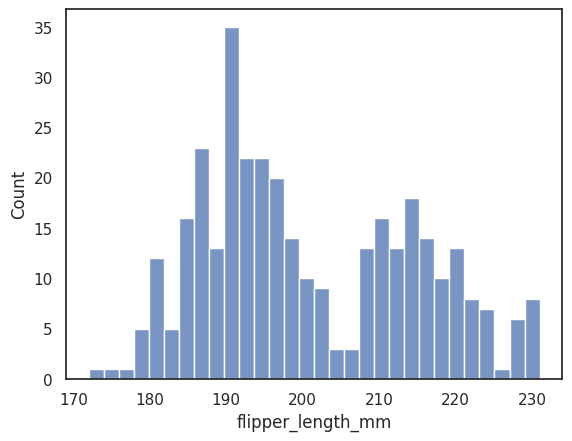

In [5]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

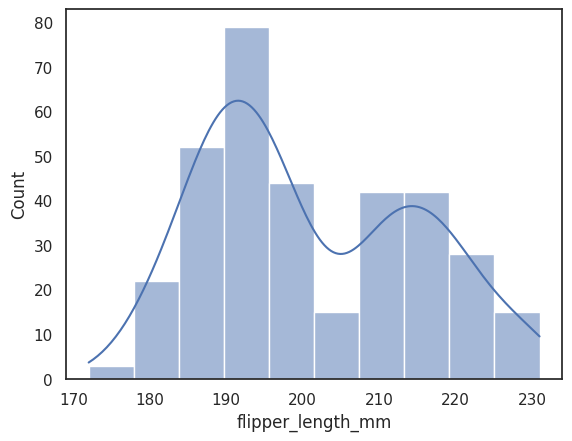

In [6]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

If neither `x` nor `y` is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column:

<Axes: ylabel='Count'>

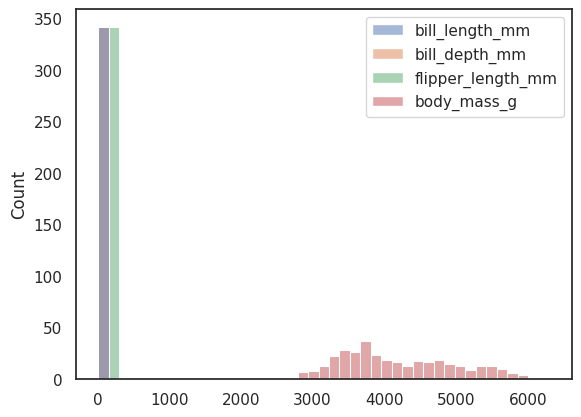

In [7]:
sns.histplot(data=penguins)

You can otherwise draw multiple histograms from a long-form dataset with hue mapping:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

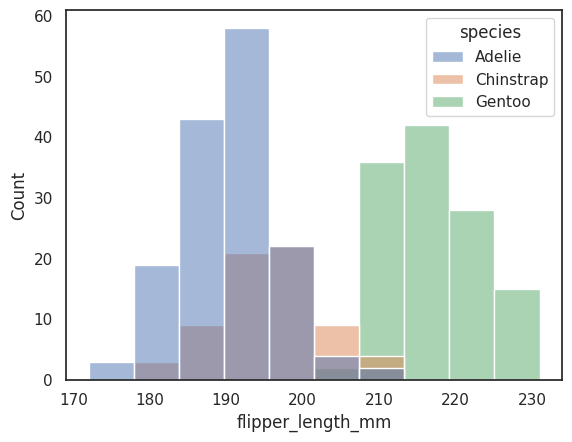

In [8]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

The default approach to plotting multiple distributions is to "layer" them, but you can also "stack" them:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

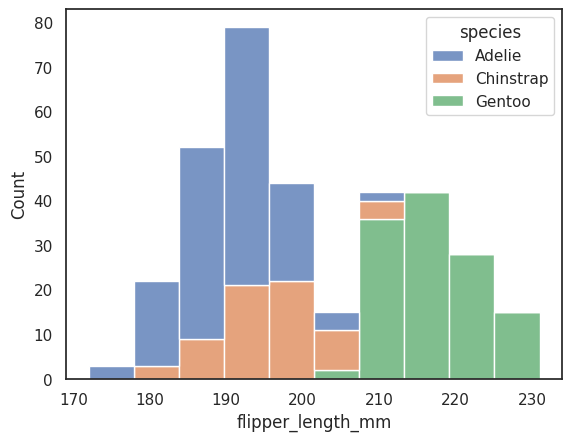

In [9]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

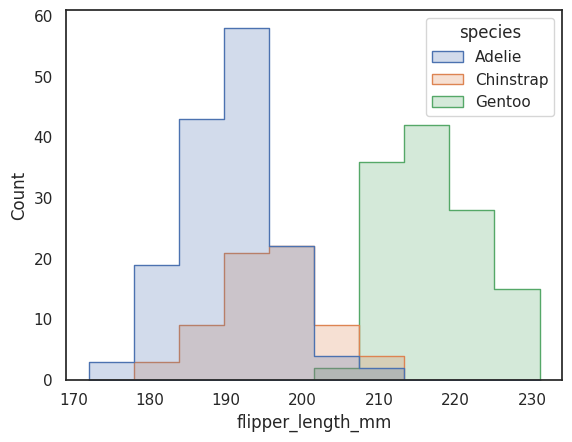

In [10]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="step")

You can move even farther away from bars by drawing a polygon with vertices in the center of each bin. This may make it easier to see the shape of the distribution, but use with caution: it will be less obvious to your audience that they are looking at a histogram:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

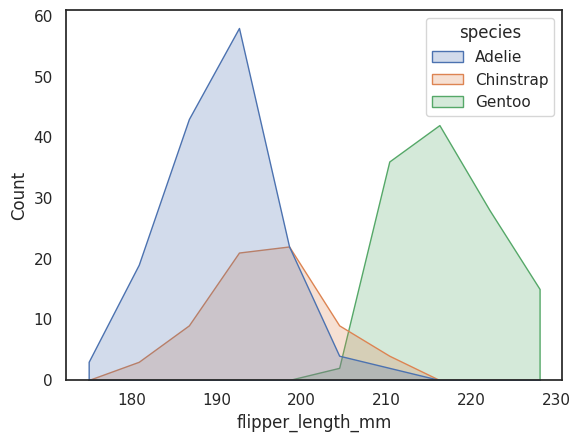

In [11]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="poly")

To compare the distribution of subsets that differ substantially in size, use independent density normalization:

<Axes: xlabel='bill_length_mm', ylabel='Density'>

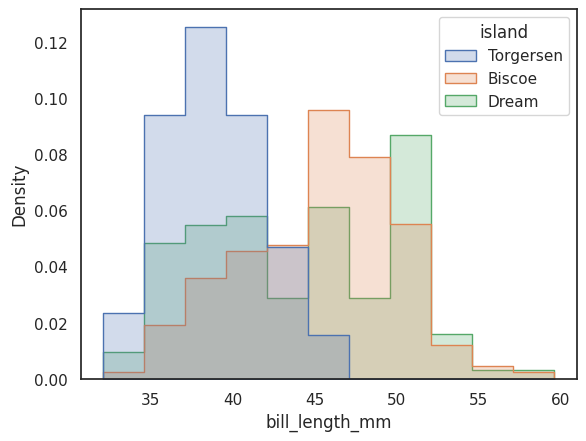

In [12]:
sns.histplot(
    penguins, x="bill_length_mm", hue="island", element="step",
    stat="density", common_norm=False,
)

It's also possible to normalize so that each bar's height shows a probability, proportion, or percent, which make more sense for discrete variables:

<Axes: xlabel='size', ylabel='Percent'>

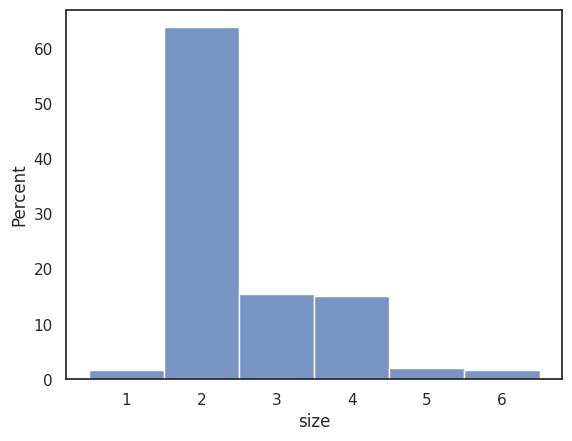

In [13]:
tips = sns.load_dataset("tips")
sns.histplot(data=tips, x="size", stat="percent", discrete=True)

You can even draw a histogram over categorical variables (although this is an experimental feature):

<Axes: xlabel='day', ylabel='Count'>

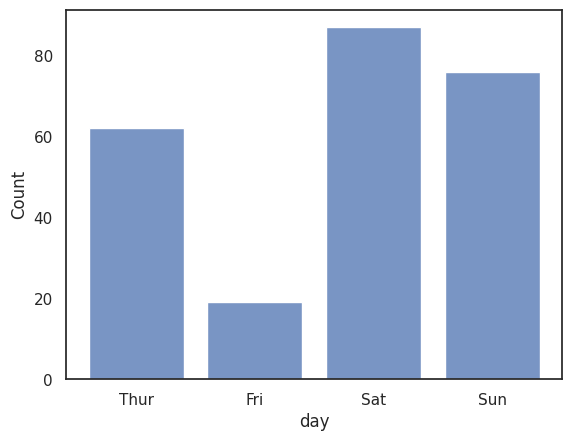

In [14]:
sns.histplot(data=tips, x="day", shrink=.8)

When using a ``hue`` semantic with discrete data, it can make sense to "dodge" the levels:

/home/marcogorelli/seaborn-dev/seaborn/_oldcore.py:1062: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/home/marcogorelli/seaborn-dev/seaborn/_oldcore.py:1062: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='day', ylabel='Count'>

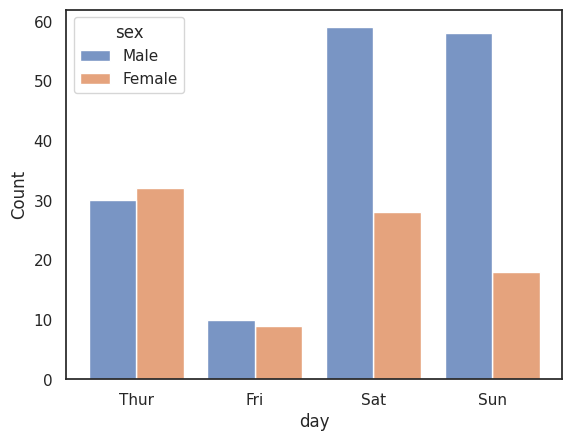

In [15]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

<Axes: xlabel='distance', ylabel='Count'>

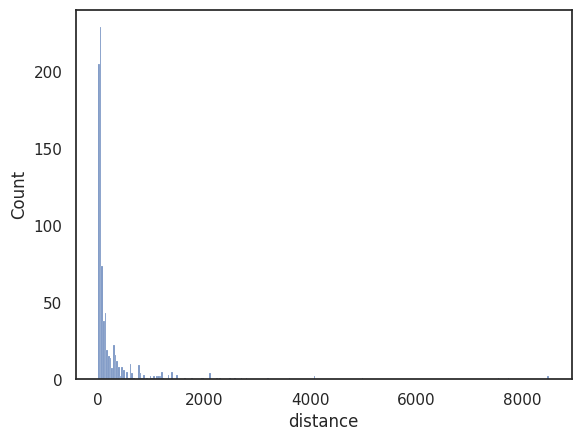

In [16]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")

To the log-scale version:

<Axes: xlabel='distance', ylabel='Count'>

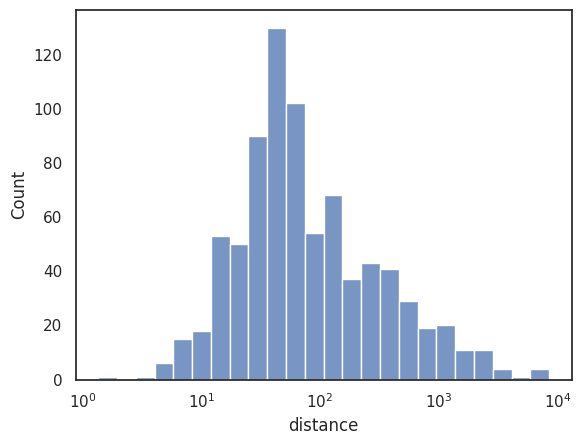

In [17]:
sns.histplot(data=planets, x="distance", log_scale=True)

There are also a number of options for how the histogram appears. You can show unfilled bars:

<Axes: xlabel='distance', ylabel='Count'>

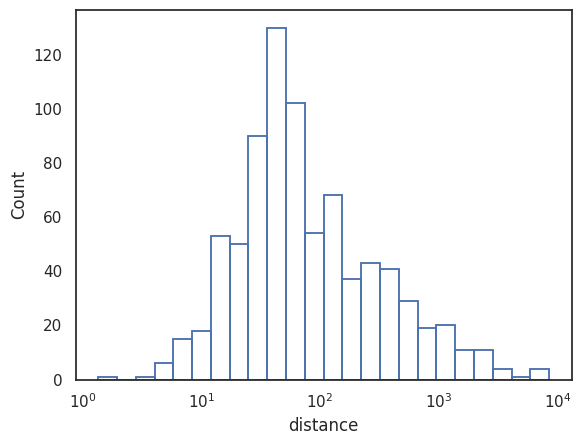

In [18]:
sns.histplot(data=planets, x="distance", log_scale=True, fill=False)

Or an unfilled step function:

<Axes: xlabel='distance', ylabel='Count'>

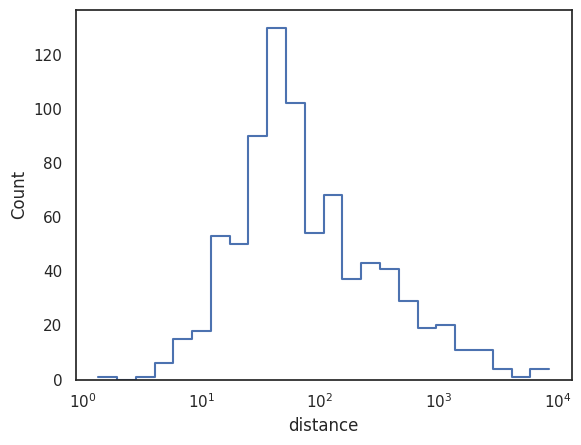

In [19]:
sns.histplot(data=planets, x="distance", log_scale=True, element="step", fill=False)

Step functions, esepcially when unfilled, make it easy to compare cumulative histograms:

<Axes: xlabel='distance', ylabel='Density'>

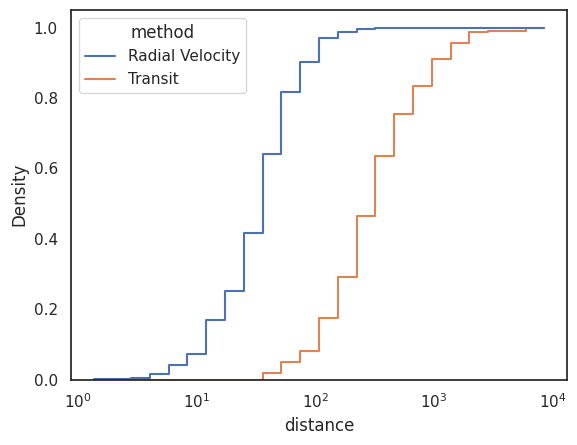

In [20]:
sns.histplot(
    data=planets, x="distance", hue="method",
    hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

When both ``x`` and ``y`` are assigned, a bivariate histogram is computed and shown as a heatmap:

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

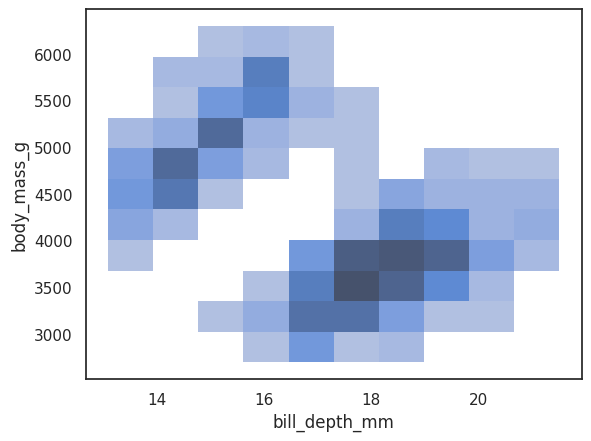

In [21]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")

It's possible to assign a ``hue`` variable too, although this will not work well if data from the different levels have substantial overlap:

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

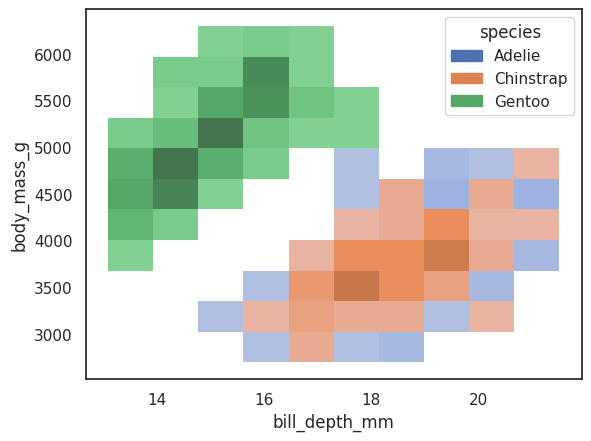

In [22]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species")

Multiple color maps can make sense when one of the variables is discrete:

<Axes: xlabel='bill_depth_mm', ylabel='species'>

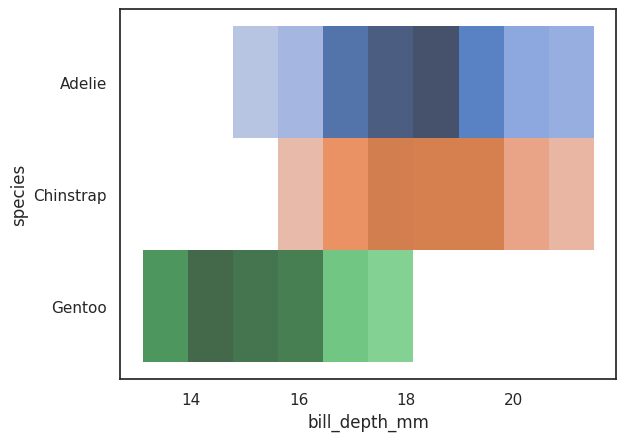

In [23]:
sns.histplot(
    penguins, x="bill_depth_mm", y="species", hue="species", legend=False
)

The bivariate histogram accepts all of the same options for computation as its univariate counterpart, using tuples to parametrize ``x`` and ``y`` independently:

<Axes: xlabel='year', ylabel='distance'>

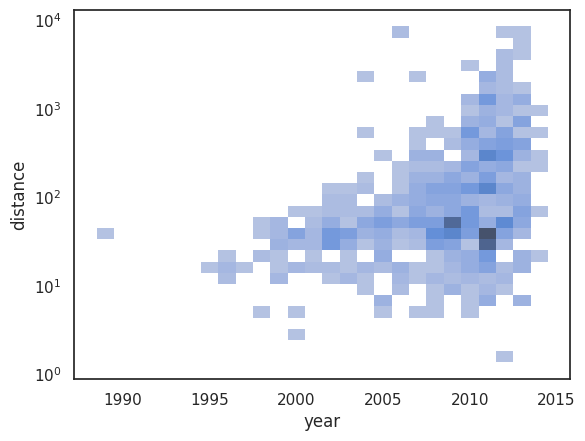

In [24]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
)

The default behavior makes cells with no observations transparent, although this can be disabled: 

<Axes: xlabel='year', ylabel='distance'>

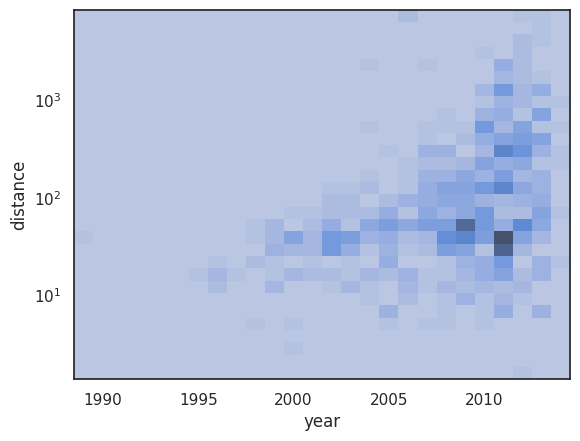

In [25]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    thresh=None,
)

It's also possible to set the threshold and colormap saturation point in terms of the proportion of cumulative counts:

<Axes: xlabel='year', ylabel='distance'>

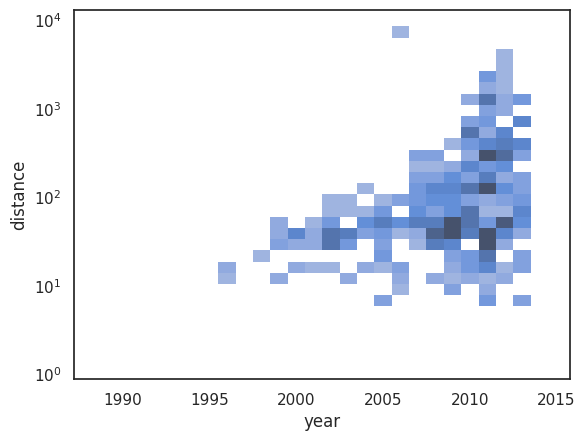

In [26]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    pthresh=.05, pmax=.9,
)

To annotate the colormap, add a colorbar:

<Axes: xlabel='year', ylabel='distance'>

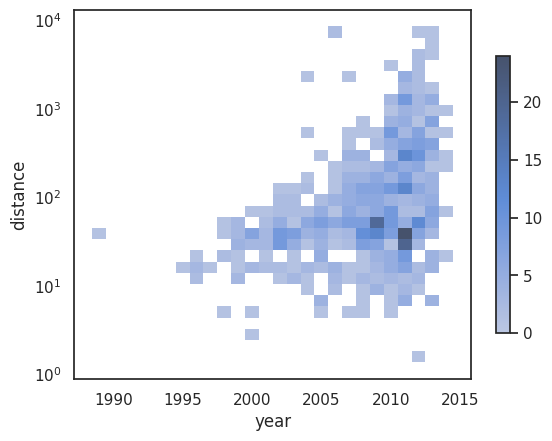

In [27]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)